In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
df = pd.read_csv('H:\ML with VS\Material Lifespan\Material_Lifespan_Dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\SAIDUL ISLAM\AppData\Local\Temp\ipykernel_18152\1605049609.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('H:\ML with VS\Material Lifespan\Material_Lifespan_Dataset.csv')


In [5]:
categorical_cols = ["ComponentType", "StructureType", "InitialPosition", "FormationMethod"]

# One-hot encode the specified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)




In [6]:
# Check total missing values per column
print("Missing values in each column:")
print(df_encoded.isnull().sum())


# Check if the entire dataset has any missing values
print("\nAny missing values in DataFrame?:", df_encoded.isnull().values.any())



Missing values in each column:
PredictedHours                0
CoolRate                      0
QuenchDuration                0
ForgeDuration                 0
HeatProcessTime               0
NickelComposition             0
IronComposition               0
CobaltComposition             0
ChromiumComposition           0
MinorDefects                  0
MajorDefects                  0
EdgeDefects                   0
ComponentType_Blade           0
ComponentType_Block           0
ComponentType_Nozzle          0
ComponentType_Valve           0
StructureType_colGrain        0
StructureType_equiGrain       0
StructureType_singleGrain     0
InitialPosition_Bottom        0
InitialPosition_Top           0
FormationMethod_Continuous    0
FormationMethod_Die           0
FormationMethod_Investment    0
dtype: int64

Any missing values in DataFrame?: False


In [7]:
# Define features and target
X = df_encoded.drop(columns=["PredictedHours"])  # all numeric + encoded features
y = df_encoded["PredictedHours"]

#print("Final DataFrame:")
#print(df.head())

print("\nX Columns:\n", X.columns.tolist())
print("\nX Sample Data:\n", X.head())
print([col for col in df_encoded.columns if any(cat in col for cat in categorical_cols)])



X Columns:
 ['CoolRate', 'QuenchDuration', 'ForgeDuration', 'HeatProcessTime', 'NickelComposition', 'IronComposition', 'CobaltComposition', 'ChromiumComposition', 'MinorDefects', 'MajorDefects', 'EdgeDefects', 'ComponentType_Blade', 'ComponentType_Block', 'ComponentType_Nozzle', 'ComponentType_Valve', 'StructureType_colGrain', 'StructureType_equiGrain', 'StructureType_singleGrain', 'InitialPosition_Bottom', 'InitialPosition_Top', 'FormationMethod_Continuous', 'FormationMethod_Die', 'FormationMethod_Investment']

X Sample Data:
    CoolRate  QuenchDuration  ForgeDuration  HeatProcessTime  \
0    12.836           3.803          6.515           47.005   
1    19.032           2.593          3.521           45.246   
2    28.418           0.772          1.327            9.639   
3     9.084           1.990          2.201           20.009   
4    16.196           4.092          3.881           15.904   

   NickelComposition  IronComposition  CobaltComposition  ChromiumComposition  \
0    

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

# Define the actual numeric columns to scale (excluding one-hot encoded categorical features)
numerical_cols = [
    "CoolRate", "QuenchDuration", "ForgeDuration", "HeatProcessTime",
    "NickelComposition", "IronComposition", "CobaltComposition", "ChromiumComposition",
    "MinorDefects", "MajorDefects", "EdgeDefects"
]

# Initialize scaler
scaler = StandardScaler()

# Fit-transform on train set,test set
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Model initialization
rf = RandomForestRegressor(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    
    
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model selection
best_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Step 6: Cross-validated predictions on training set (for Q²)
y_cv_pred = cross_val_predict(best_model, X_train, y_train, cv=5)

# Evaluation metrics
# --- Train Set ---
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# --- Test Set ---
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# --- Cross-Validation ---
neg_mse_cv_scores = cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cv = np.mean(np.sqrt(-neg_mse_cv_scores))  # RMSECV
q2 = r2_score(y_train, y_cv_pred)  # Q²

Model Random Forest Regressor
🔧 Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

📊 Train Set Metrics:
R² Train:  0.9905
RMSE Train: 33.6807
MAE Train:  26.1741

📈 Test Set Metrics:
R² Test:  0.9277
RMSE Test: 86.5184
MAE Test:  70.0123

🔁 Cross-Validation Metrics:
Q² (Cross-validated R²): 0.9212
RMSECV: 96.6552


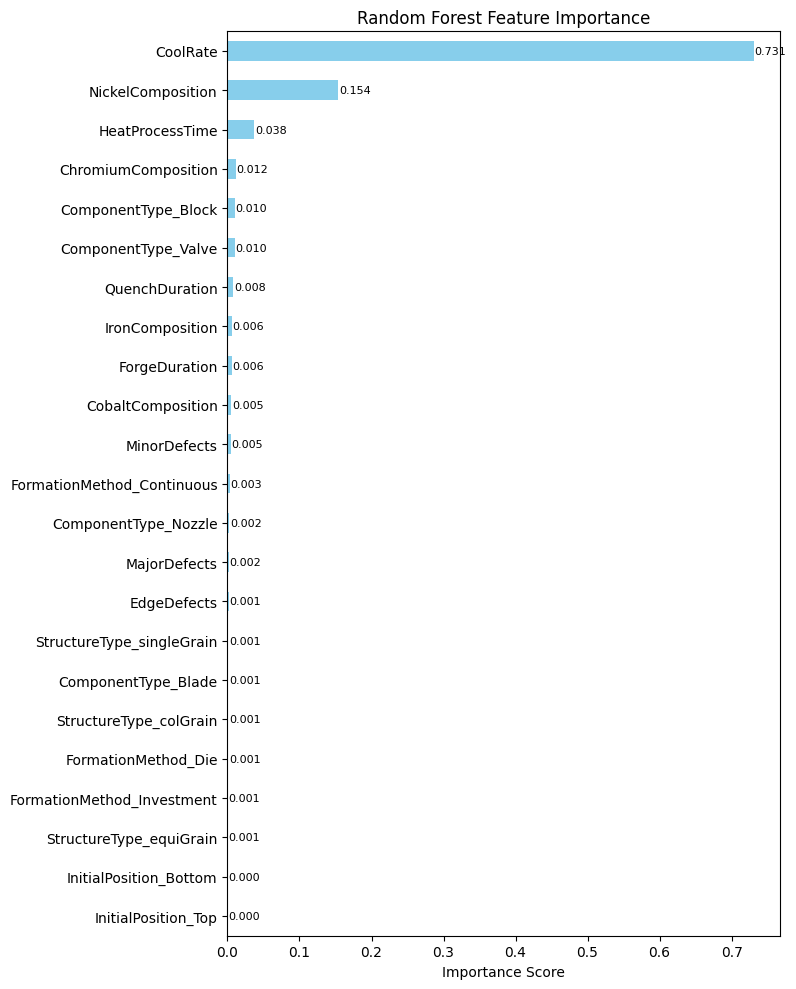

In [11]:

print("Model Random Forest Regressor")
print("🔧 Best Parameters:", grid_search.best_params_)
print("\n📊 Train Set Metrics:")
print(f"R² Train:  {r2_train:.4f}")
print(f"RMSE Train: {rmse_train:.4f}")
print(f"MAE Train:  {mae_train:.4f}")

print("\n📈 Test Set Metrics:")
print(f"R² Test:  {r2_test:.4f}")
print(f"RMSE Test: {rmse_test:.4f}")
print(f"MAE Test:  {mae_test:.4f}")

print("\n🔁 Cross-Validation Metrics:")
print(f"Q² (Cross-validated R²): {q2:.4f}")
print(f"RMSECV: {rmse_cv:.4f}")

# Feature Importance
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=True)


# Plot with scale and value labels
plt.figure(figsize=(8, 10))
ax = importances_sorted.plot(kind='barh', color='skyblue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()

# Add scale (value labels)
for i, v in enumerate(importances_sorted):
    ax.text(v + 0.001, i, f"{v:.3f}", va='center', fontsize=8)

plt.show()

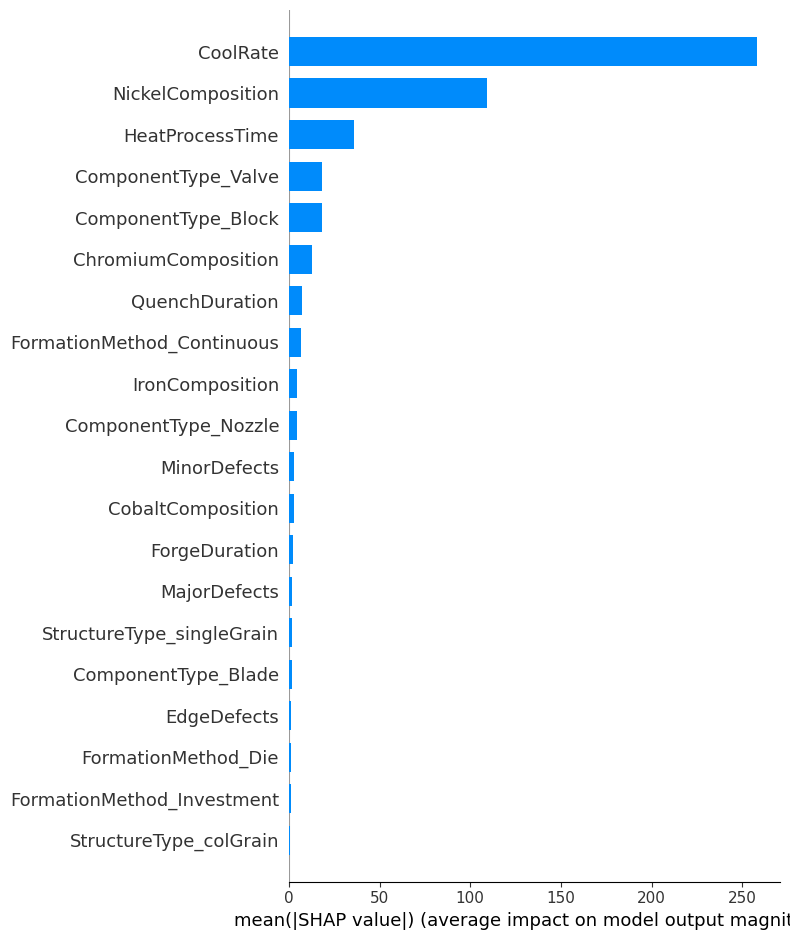

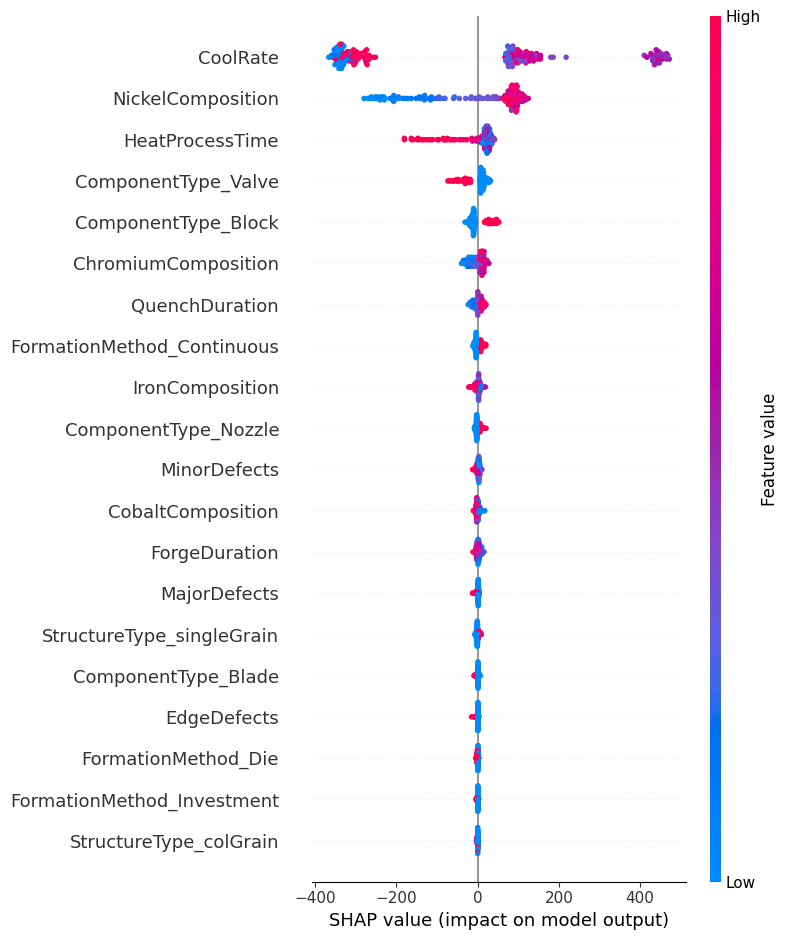

In [12]:
import shap

# Create SHAP explainer (tree-based)
explainer_rf = shap.Explainer(best_model)  # best_model is your trained RF model
shap_values_rf = explainer_rf(X_test)

# Summary plot
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", show=True)
shap.summary_plot(shap_values_rf, X_test, show=True)

In [13]:
from sklearn.svm import SVR

# Scale y_train
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Model initialization
svr = SVR()
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10, 100],
    'gamma': ['scale', 0.01, 0.001],
    'epsilon': [0.1, 1]
}

#Grid search with 5-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train_scaled)

#Best model selection
best_model = grid_search.best_estimator_

# Predictions (scaled → then inverse transform)
y_train_pred_scaled = best_model.predict(X_train)
y_test_pred_scaled = best_model.predict(X_test)

y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# cross-validated predictions for Q²
y_cv_pred_scaled = cross_val_predict(best_model, X_train, y_train_scaled, cv=5)
y_cv_pred = scaler_y.inverse_transform(y_cv_pred_scaled.reshape(-1, 1)).ravel()

# Evaluation metrics
# --- Train Set ---
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# --- Test Set ---
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# --- Cross-Validation ---
neg_mse_cv_scores = cross_val_score(best_model, X_train, y_train_scaled, scoring='neg_mean_squared_error', cv=5)
#rmse_cv = np.mean(np.sqrt(-neg_mse_cv_scores))  # RMSECV
rmse_cv = np.sqrt(mean_squared_error(y_train, y_cv_pred))
q2 = r2_score(y_train, y_cv_pred)  # Q²







In [17]:
print("Model SVR")

print("🔧 Best Parameters:", grid_search.best_params_)

print("\n📊 Train Set Metrics:")
print(f"R² Train:  {r2_train:.4f}")
print(f"RMSE Train: {rmse_train:.4f}")
print(f"MAE Train:  {mae_train:.4f}")

print("\n📈 Test Set Metrics:")
print(f"R² Test:  {r2_test:.4f}")
print(f"RMSE Test: {rmse_test:.4f}")
print(f"MAE Test:  {mae_test:.4f}")

print("\n🔁 Cross-Validation Metrics:")
print(f"Q² (Cross-validated R²): {q2:.4f}")
print(f"RMSECV: {rmse_cv:.4f}")

Model SVR
🔧 Best Parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

📊 Train Set Metrics:
R² Train:  0.9099
RMSE Train: 103.6108
MAE Train:  74.6615

📈 Test Set Metrics:
R² Test:  0.7176
RMSE Test: 170.9972
MAE Test:  135.8447

🔁 Cross-Validation Metrics:
Q² (Cross-validated R²): 0.7371
RMSECV: 176.9892


In [18]:
from xgboost import XGBRegressor


#Model initialization
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

#Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1]
}

#Grid search with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

#Best model selection
best_model = grid_search.best_estimator_

#Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#Cross-validated predictions on training set (for Q²)
y_cv_pred = cross_val_predict(best_model, X_train, y_train, cv=5)

#Evaluation metrics
# --- Train Set ---
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# --- Test Set ---
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# --- Cross-Validation ---
neg_mse_cv_scores = cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cv = np.mean(np.sqrt(-neg_mse_cv_scores))  # RMSECV
q2 = r2_score(y_train, y_cv_pred)  # Q²


In [19]:
print("Model XGBoost Regressor")
print("===== Train Set Metrics =====")
print(f"R² (Train): {r2_train:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}")
print(f"MAE (Train): {mae_train:.4f}")

print("\n===== Test Set Metrics =====")
print(f"R² (Test): {r2_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")

print("\n===== Cross-Validation Metrics =====")
print(f"Q² (Cross-validated R²): {q2:.4f}")
print(f"RMSECV: {rmse_cv:.4f}")

print("\n===== Best Hyperparameters =====")
print(grid_search.best_params_)


Model XGBoost Regressor
===== Train Set Metrics =====
R² (Train): 0.9945
RMSE (Train): 25.5138
MAE (Train): 19.7305

===== Test Set Metrics =====
R² (Test): 0.9676
RMSE (Test): 57.9573
MAE (Test): 42.1419

===== Cross-Validation Metrics =====
Q² (Cross-validated R²): 0.9646
RMSECV: 64.5389

===== Best Hyperparameters =====
{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.7}


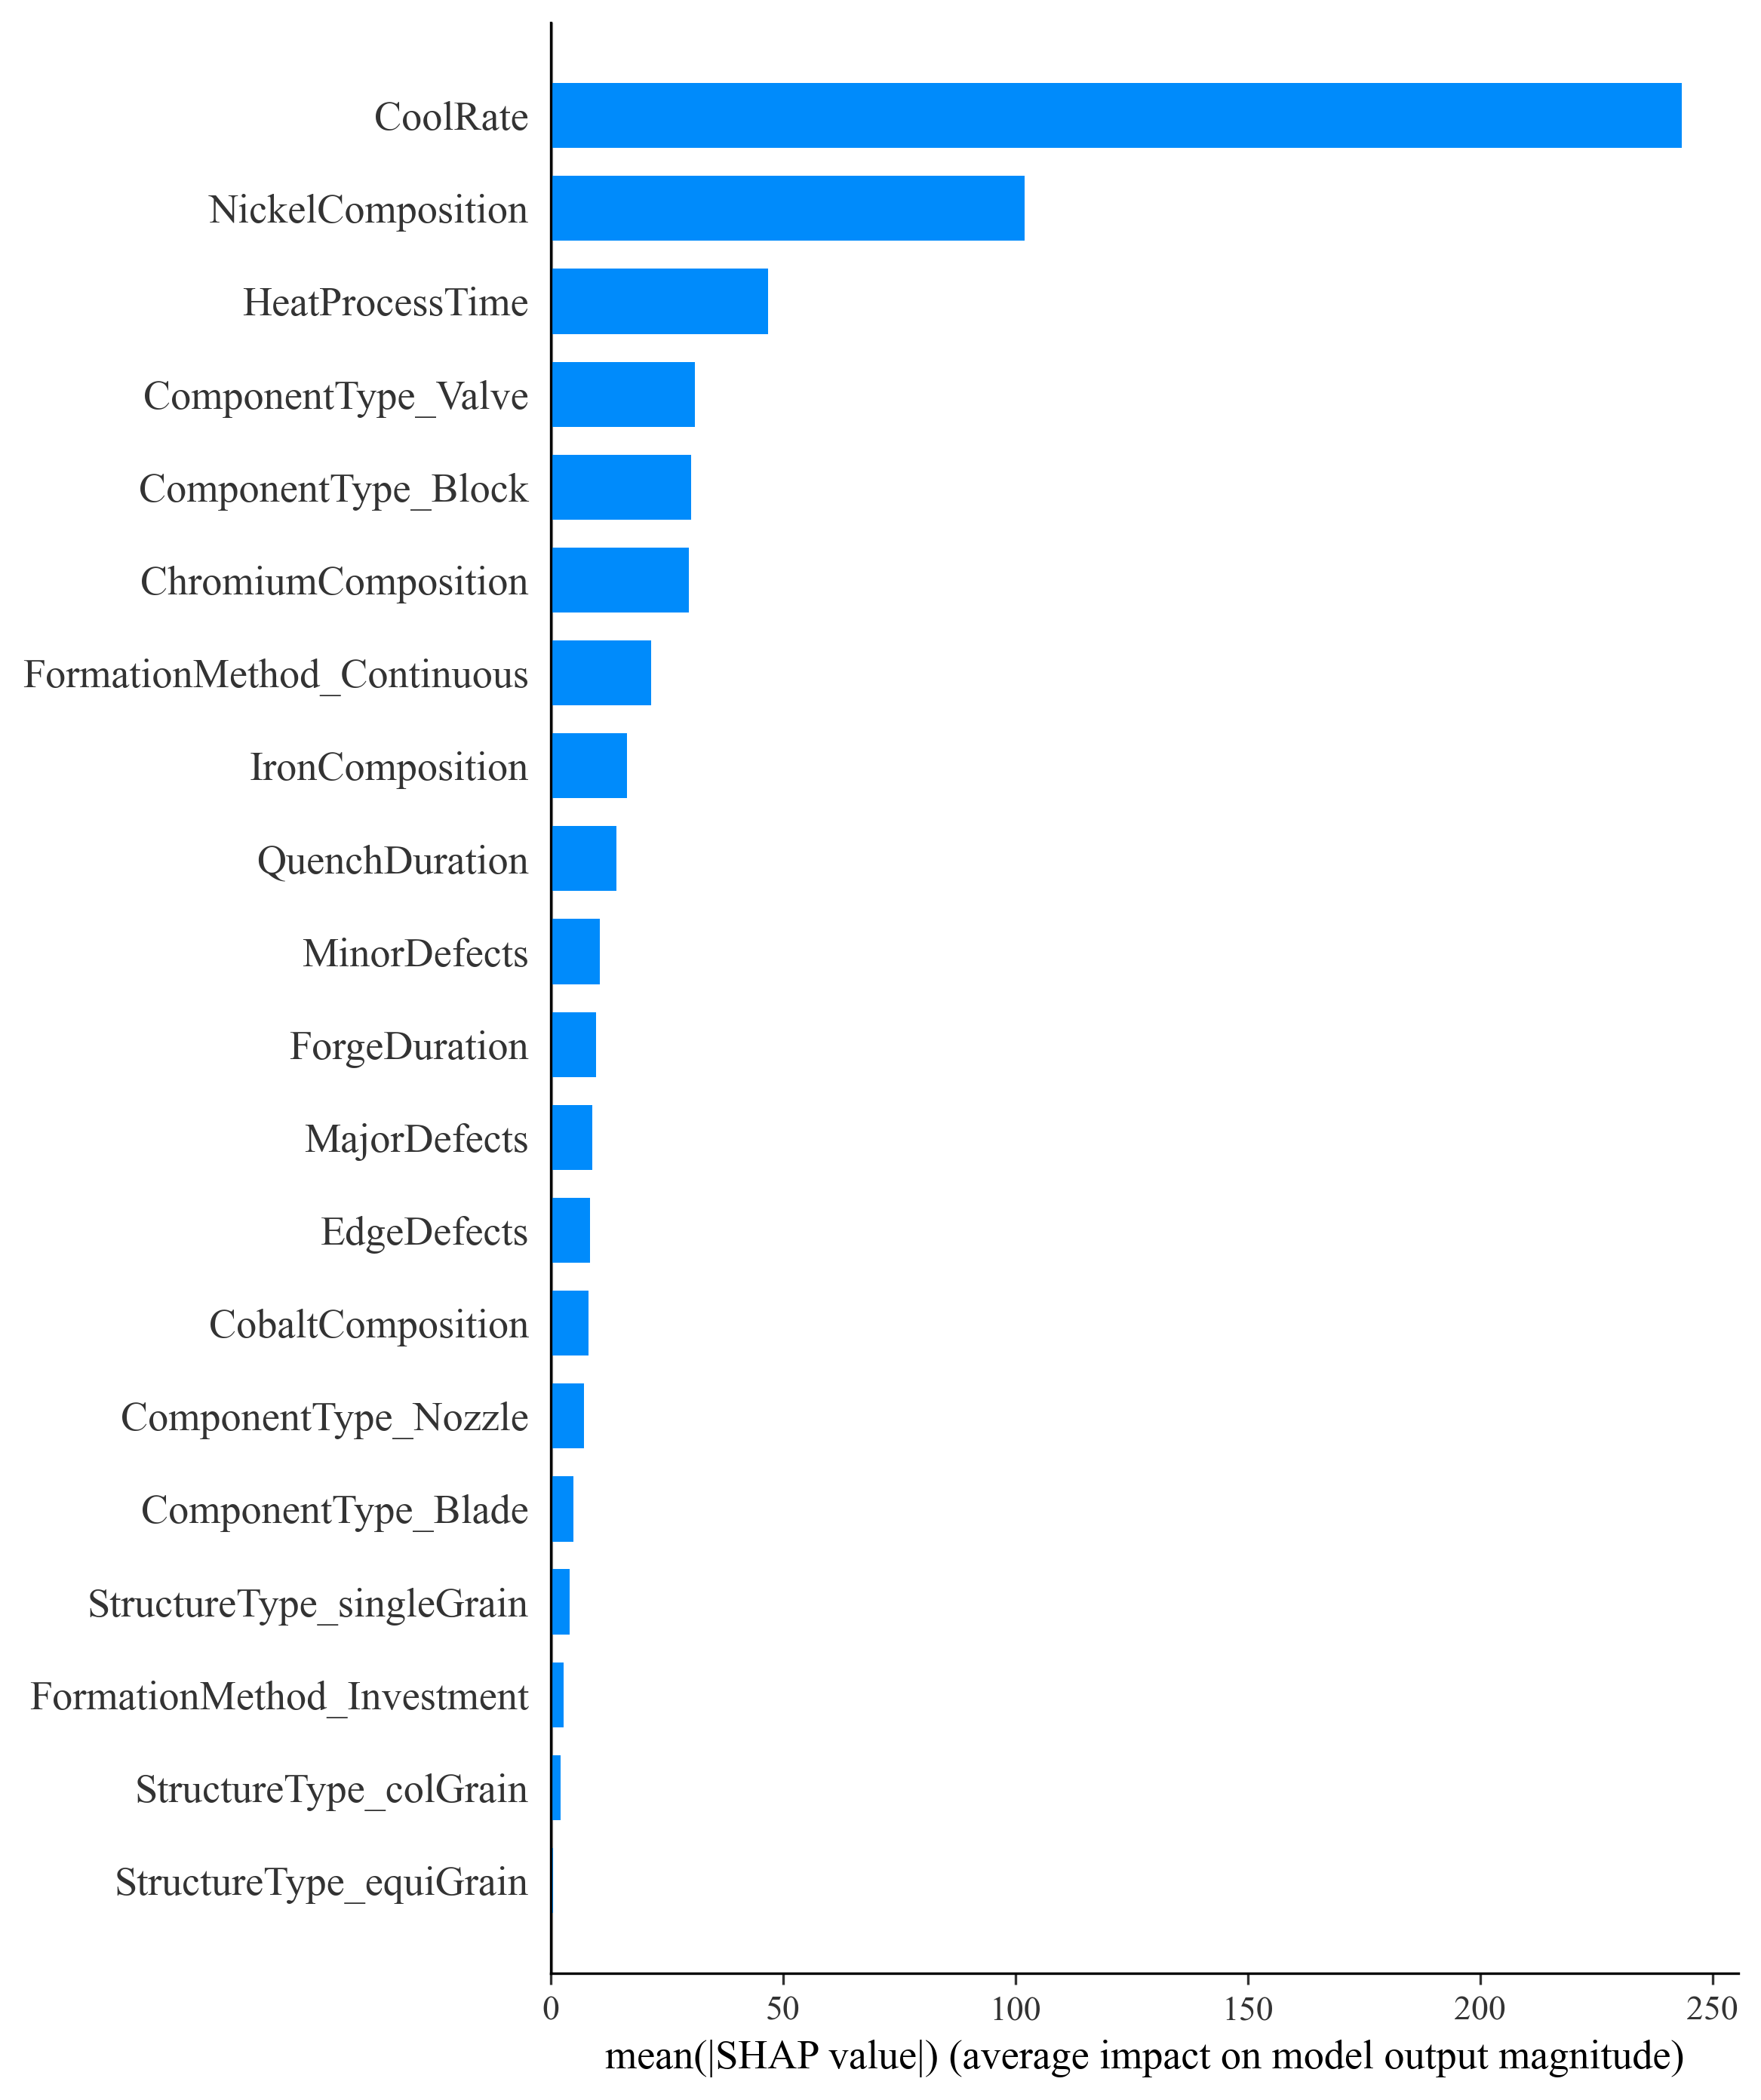

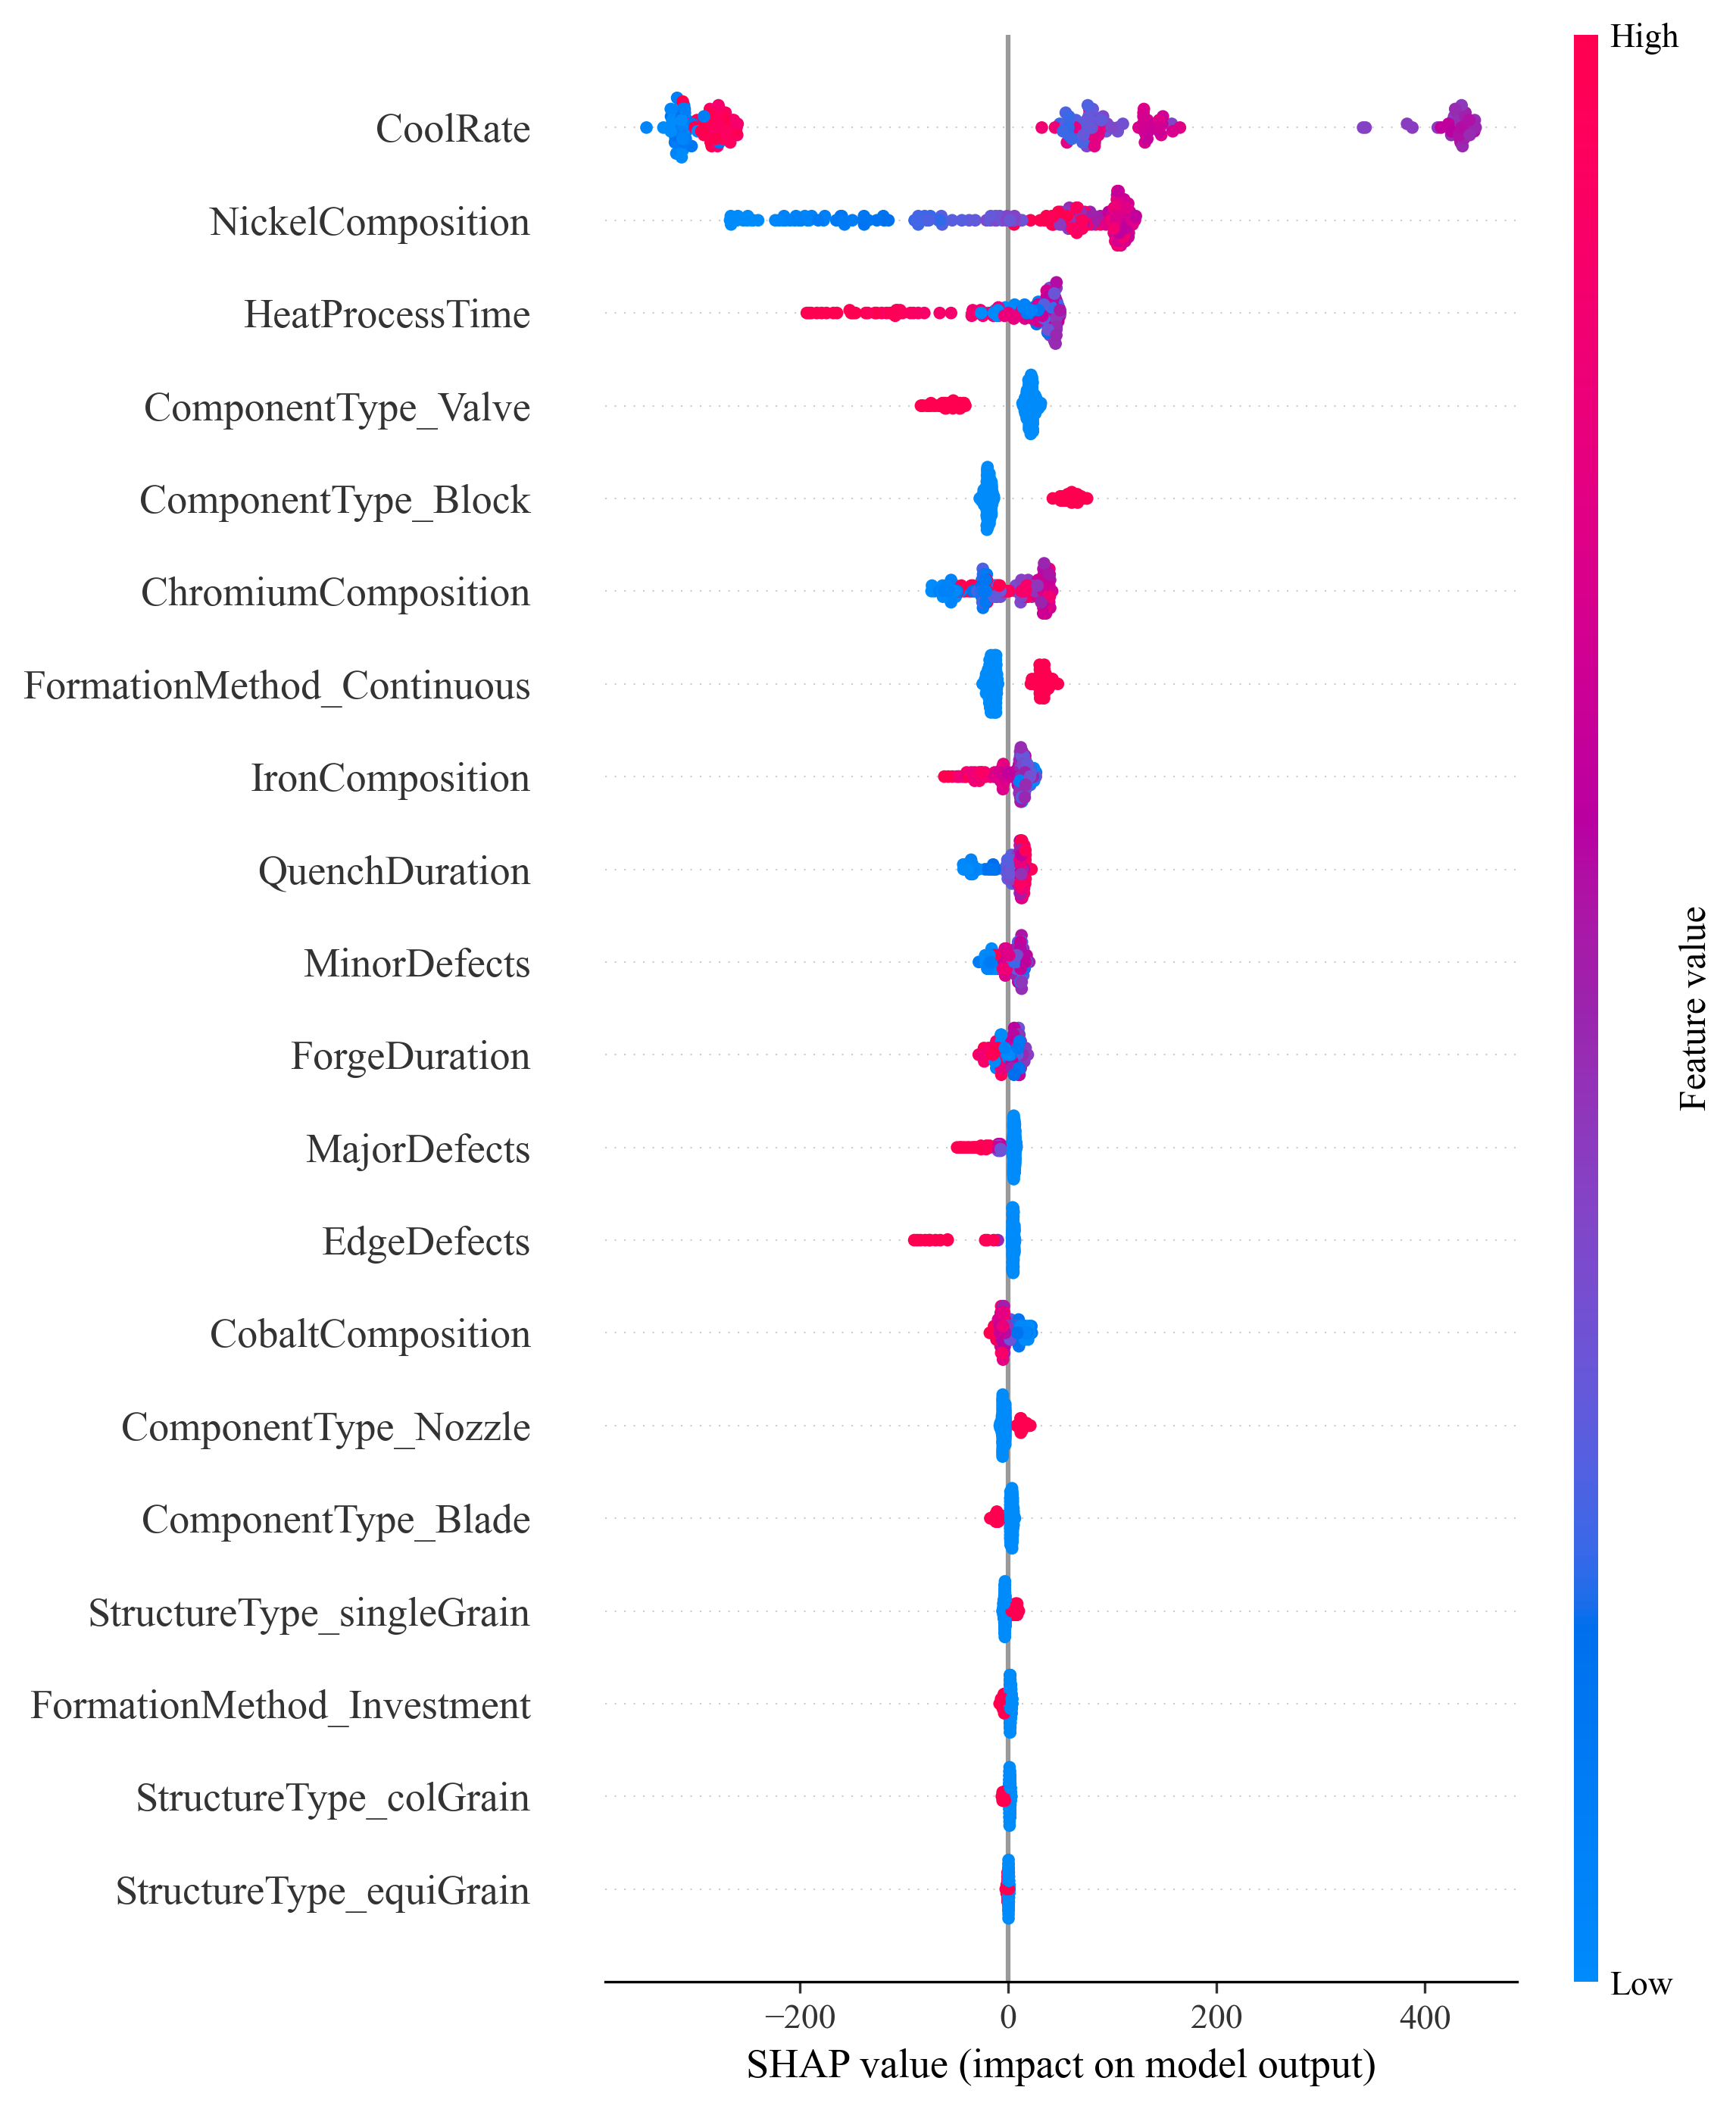

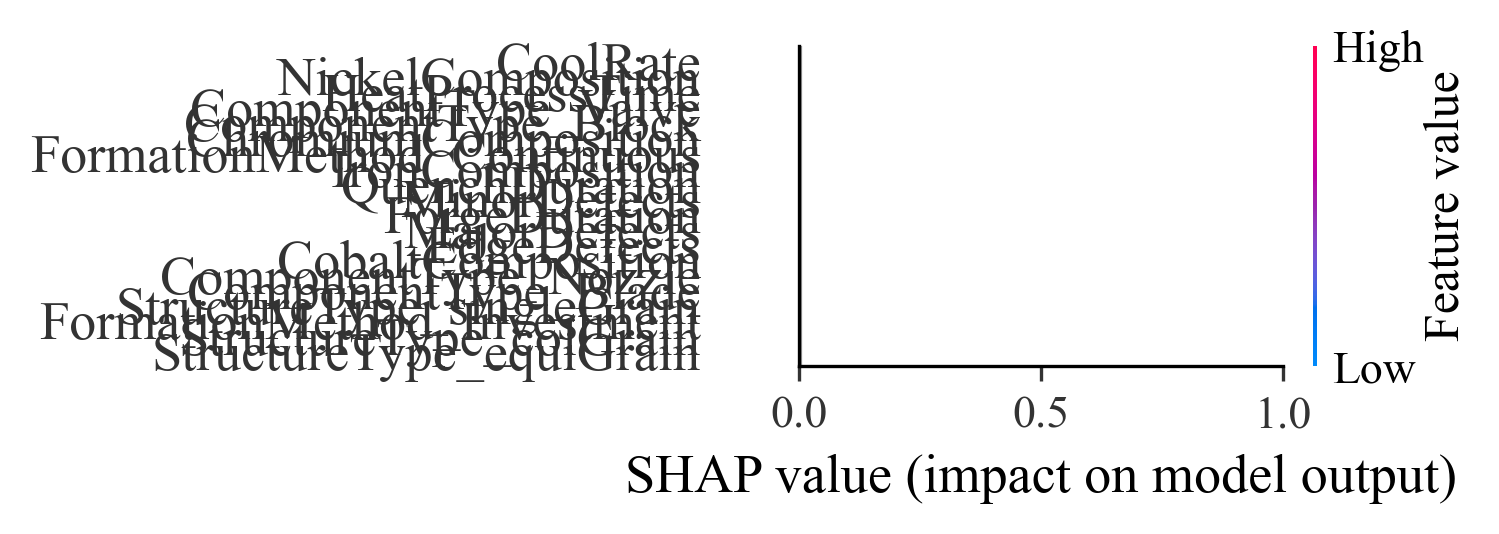

<Figure size 1920x1440 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP explainer and values
explainer_xgb = shap.Explainer(best_model)
shap_values_xgb = explainer_xgb(X_test)



# Set DPI globally
plt.rcParams['figure.dpi'] = 300

# Disable gridlines globally
plt.rcParams['axes.grid'] = False

# Set font style and size
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "Times New Roman"

# Plot summary bar plot

plt.figure(figsize=(4, 3))  # Width=6 inches, Height=4 inches

shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", show=False)
fig = plt.gcf()
ax = plt.gca()

# Add axis lines (spines)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)   # Optional: hide top spine
ax.spines['right'].set_visible(False) # Optional: hide right spine

plt.show()




shap.summary_plot(shap_values_xgb, X_test, show=False)


# Plot summary dot plot
plt.figure(figsize=(4, 1))  # Slightly larger to fit dots
shap.summary_plot(shap_values_xgb, X_test, show=False)

fig = plt.gcf()
ax = plt.gca()

ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

plt.savefig("shap_bar_plot.png", dpi=300, bbox_inches='tight')
plt.savefig("shap_dot_plot.png", dpi=300, bbox_inches='tight')






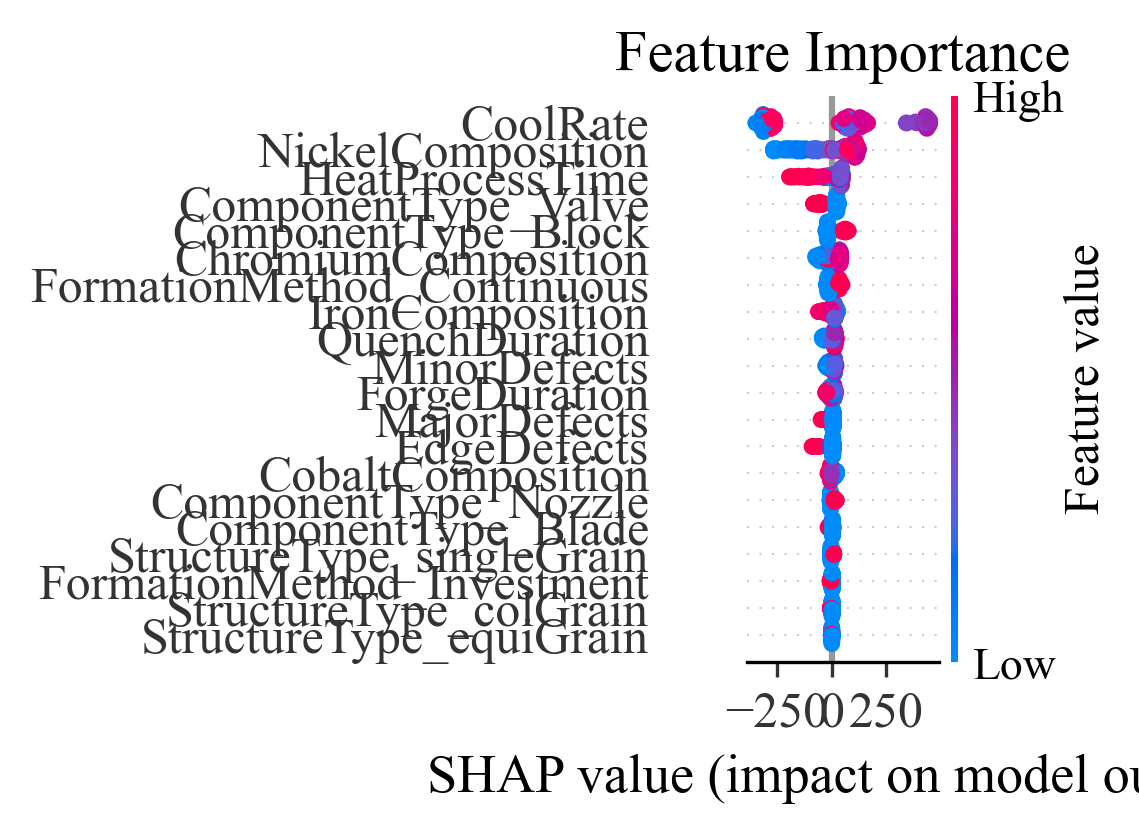

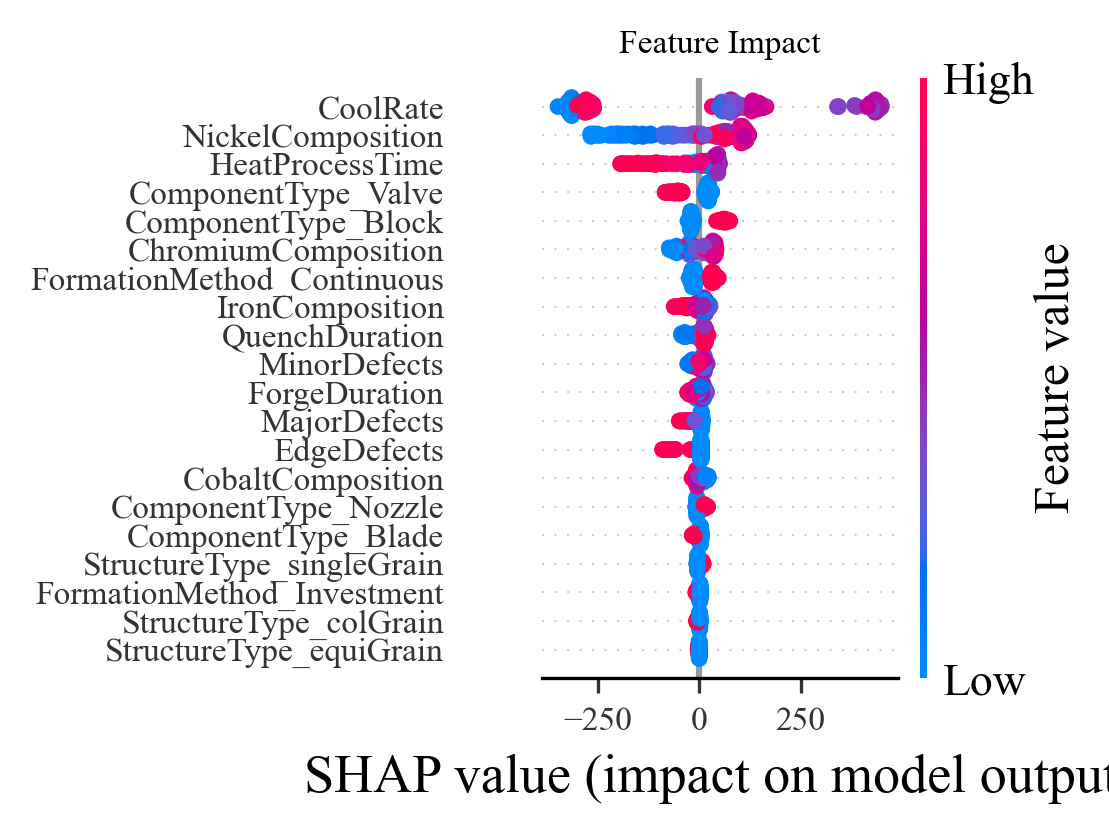

In [32]:
import shap
import matplotlib.pyplot as plt

# SHAP explainer and values
explainer_xgb = shap.Explainer(best_model)
shap_values_xgb = explainer_xgb(X_test)

# Set DPI globally and font
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.grid'] = False
plt.rcParams["font.family"] = "Times New Roman"

### -------- SHAP Bar Plot -------- ###
shap.summary_plot(shap_values_xgb, X_test, plot_type="dot", show=False, plot_size=(4, 3))

# Customize font after the plot is drawn
fig = plt.gcf()
ax = plt.gca()
ax.set_title("Feature Importance", fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Optional: control spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("shap_bar_plot.png", dpi=300, bbox_inches='tight')
plt.show()


### -------- SHAP Dot Plot -------- ###
shap.summary_plot(shap_values_xgb, X_test, show=False, plot_size=(4, 3))

# Customize font
fig = plt.gcf()
ax = plt.gca()
ax.set_title("Feature Impact", fontsize=8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("shap_dot_plot.png", dpi=300, bbox_inches='tight')
plt.show()



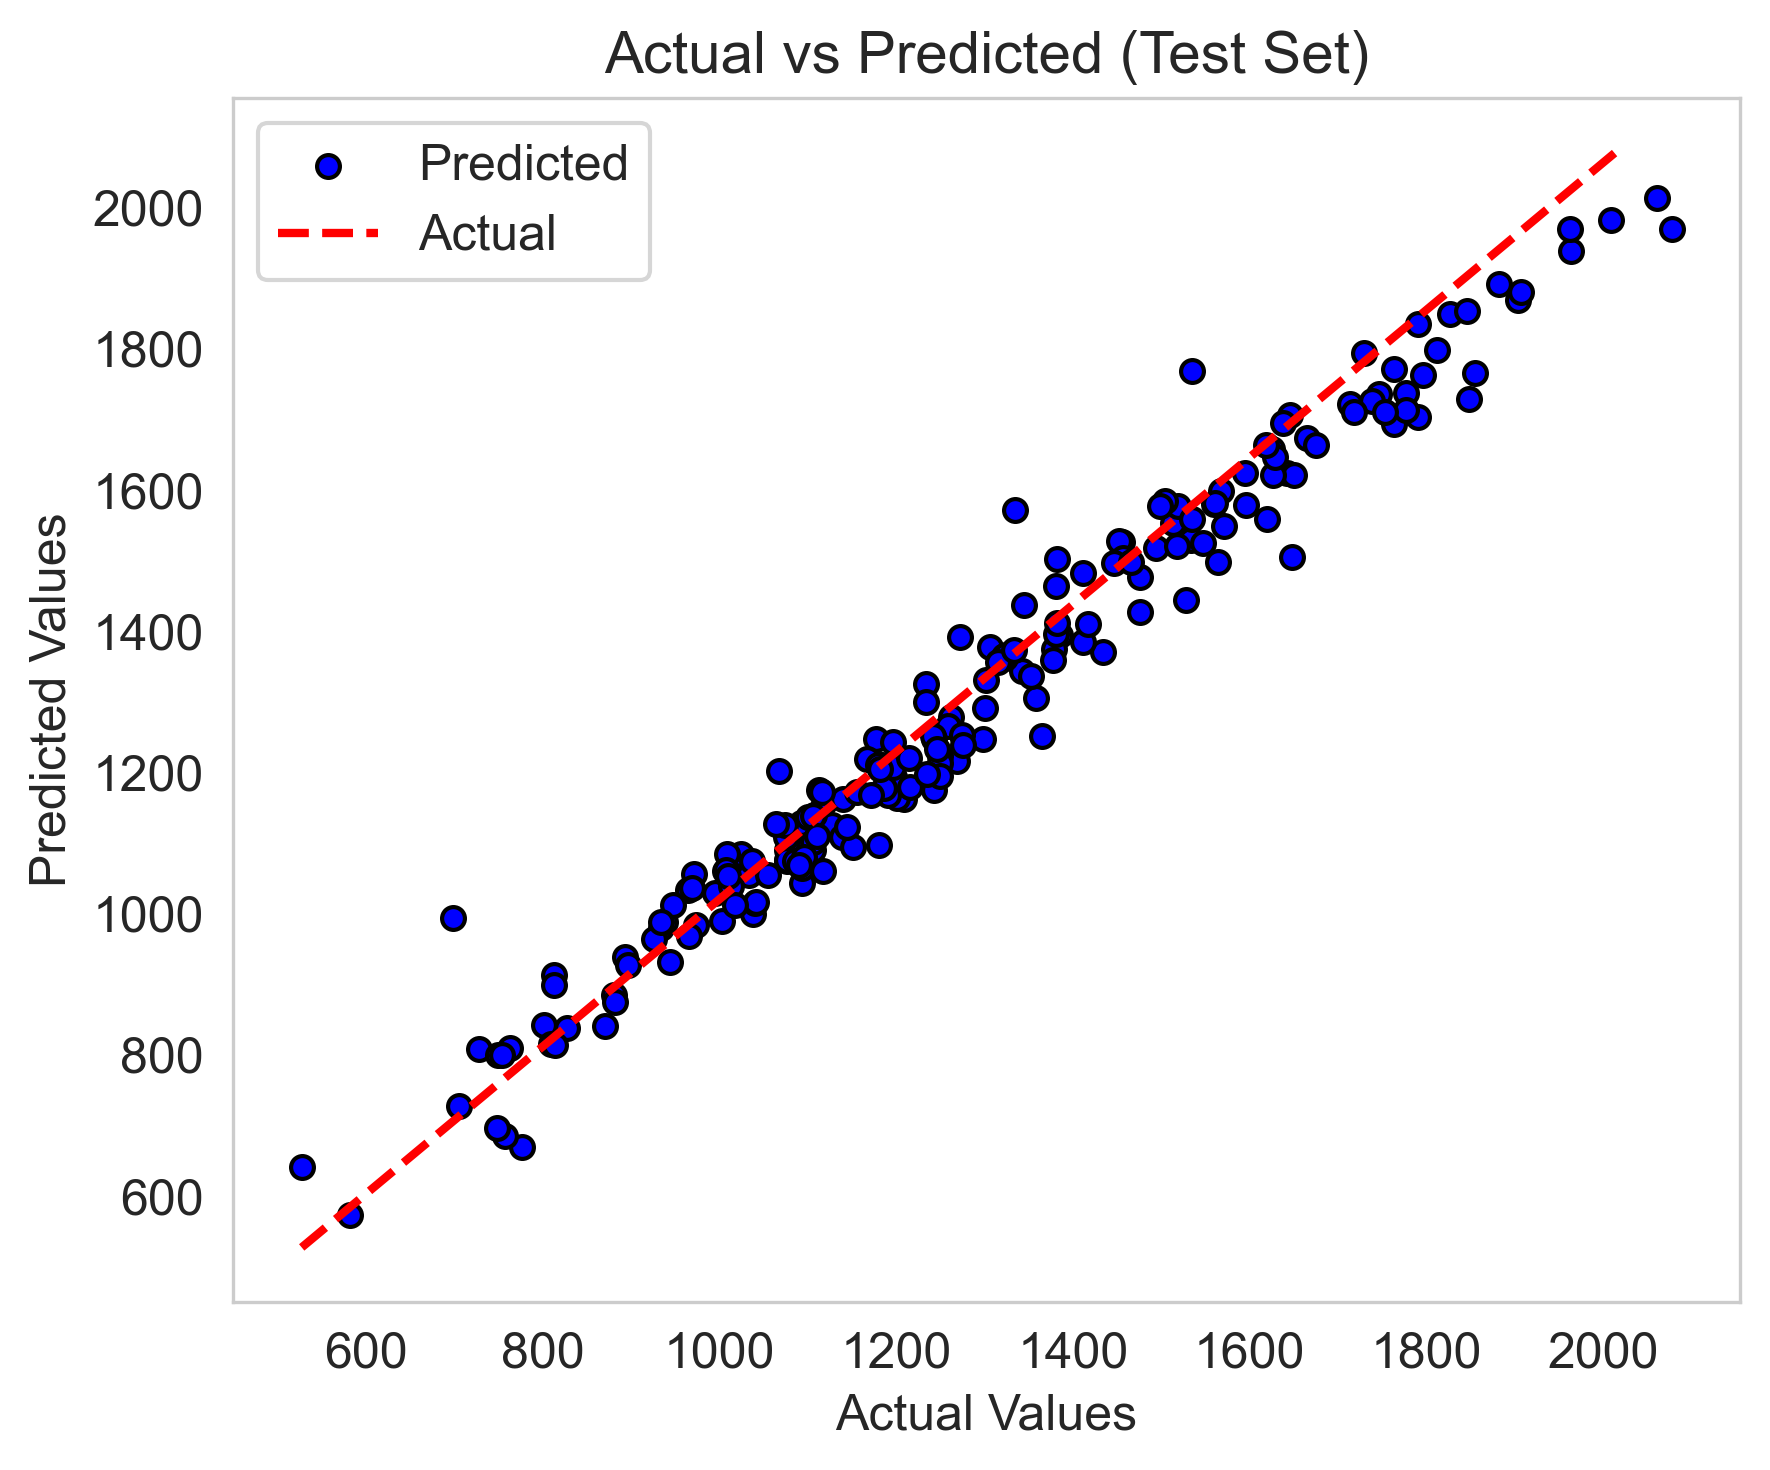

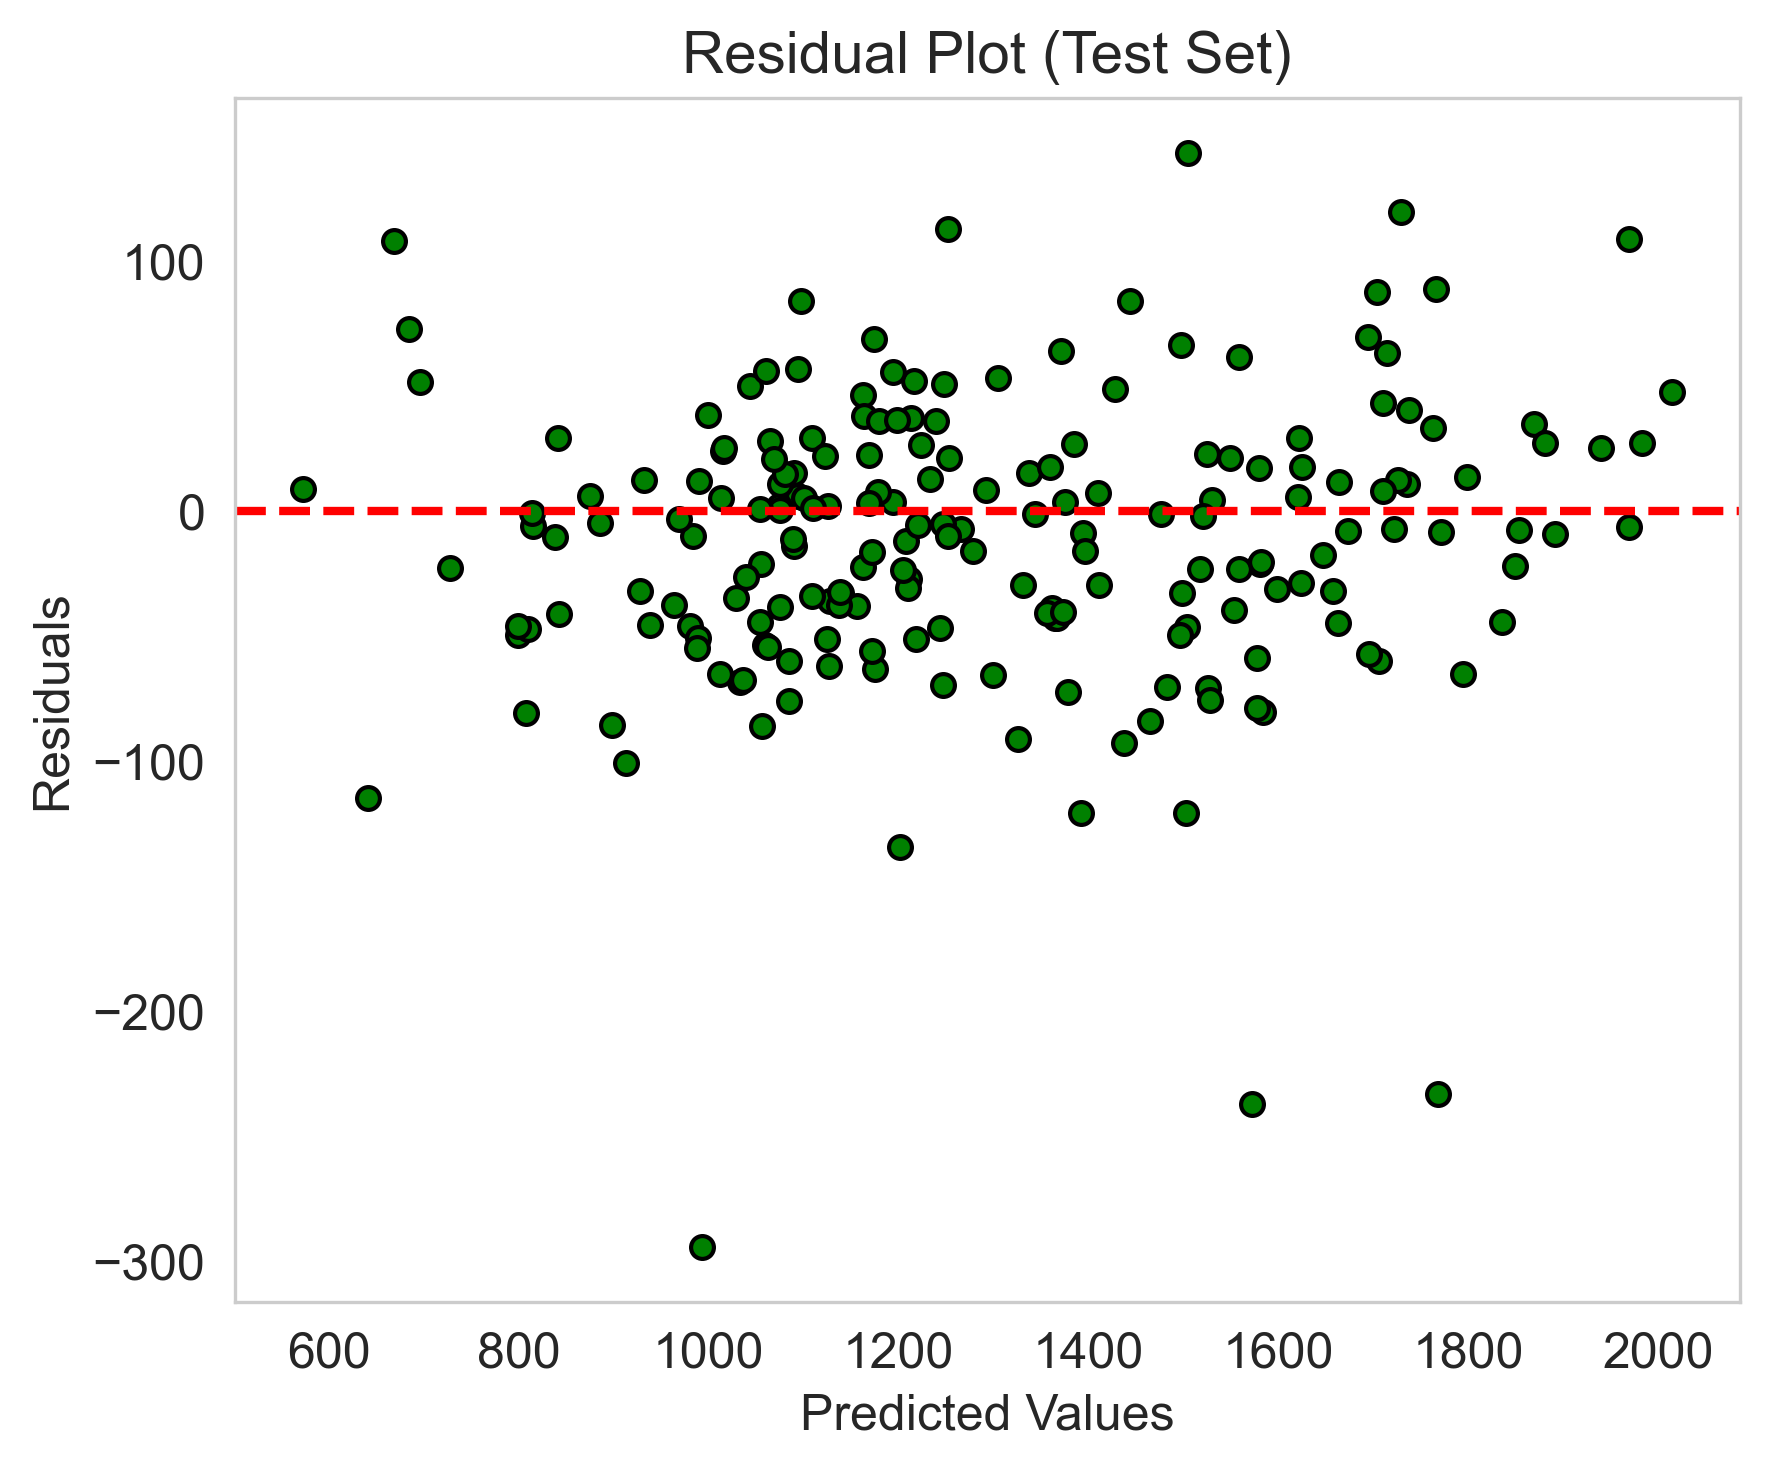

In [36]:
from matplotlib import rcParams

# Set font to Times New Roman globally
plt.rcParams["font.family"] = "Times New Roman"
sns.set_style("whitegrid")



def plot_actual_vs_pred(y_test, y_test_pred, title, save_path, dpi=300, figsize=(6, 5), font_size=12):
    plt.figure(figsize=figsize, dpi=dpi)
    plt.scatter(y_test, y_test_pred, c='blue', label='Predicted', edgecolors='k', s=30)
    plt.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Actual')
    plt.xlabel('Actual Values', fontsize=font_size)
    plt.ylabel('Predicted Values', fontsize=font_size)
    plt.title(title, fontsize=font_size + 2)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(fontsize=font_size)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(save_path, dpi=dpi)
    plt.show()
# Example usage
plot_actual_vs_pred(y_test, y_test_pred, "Actual vs Predicted (Test Set)", "actual_vs_predicted.png")

def plot_residuals(y_test, y_test_pred, title, save_path, dpi=300, figsize=(6, 5), font_size=12):
    residuals = y_test - y_test_pred
    plt.figure(figsize=figsize, dpi=dpi)
    plt.scatter(y_test_pred, residuals, c='green', edgecolors='k', s=30)
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values', fontsize=font_size)
    plt.ylabel('Residuals', fontsize=font_size)
    plt.title(title, fontsize=font_size + 2)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(save_path, dpi=dpi)
    plt.show()

# Example usage
plot_residuals(y_test, y_test_pred, "Residual Plot (Test Set)", "residual_plot.png")



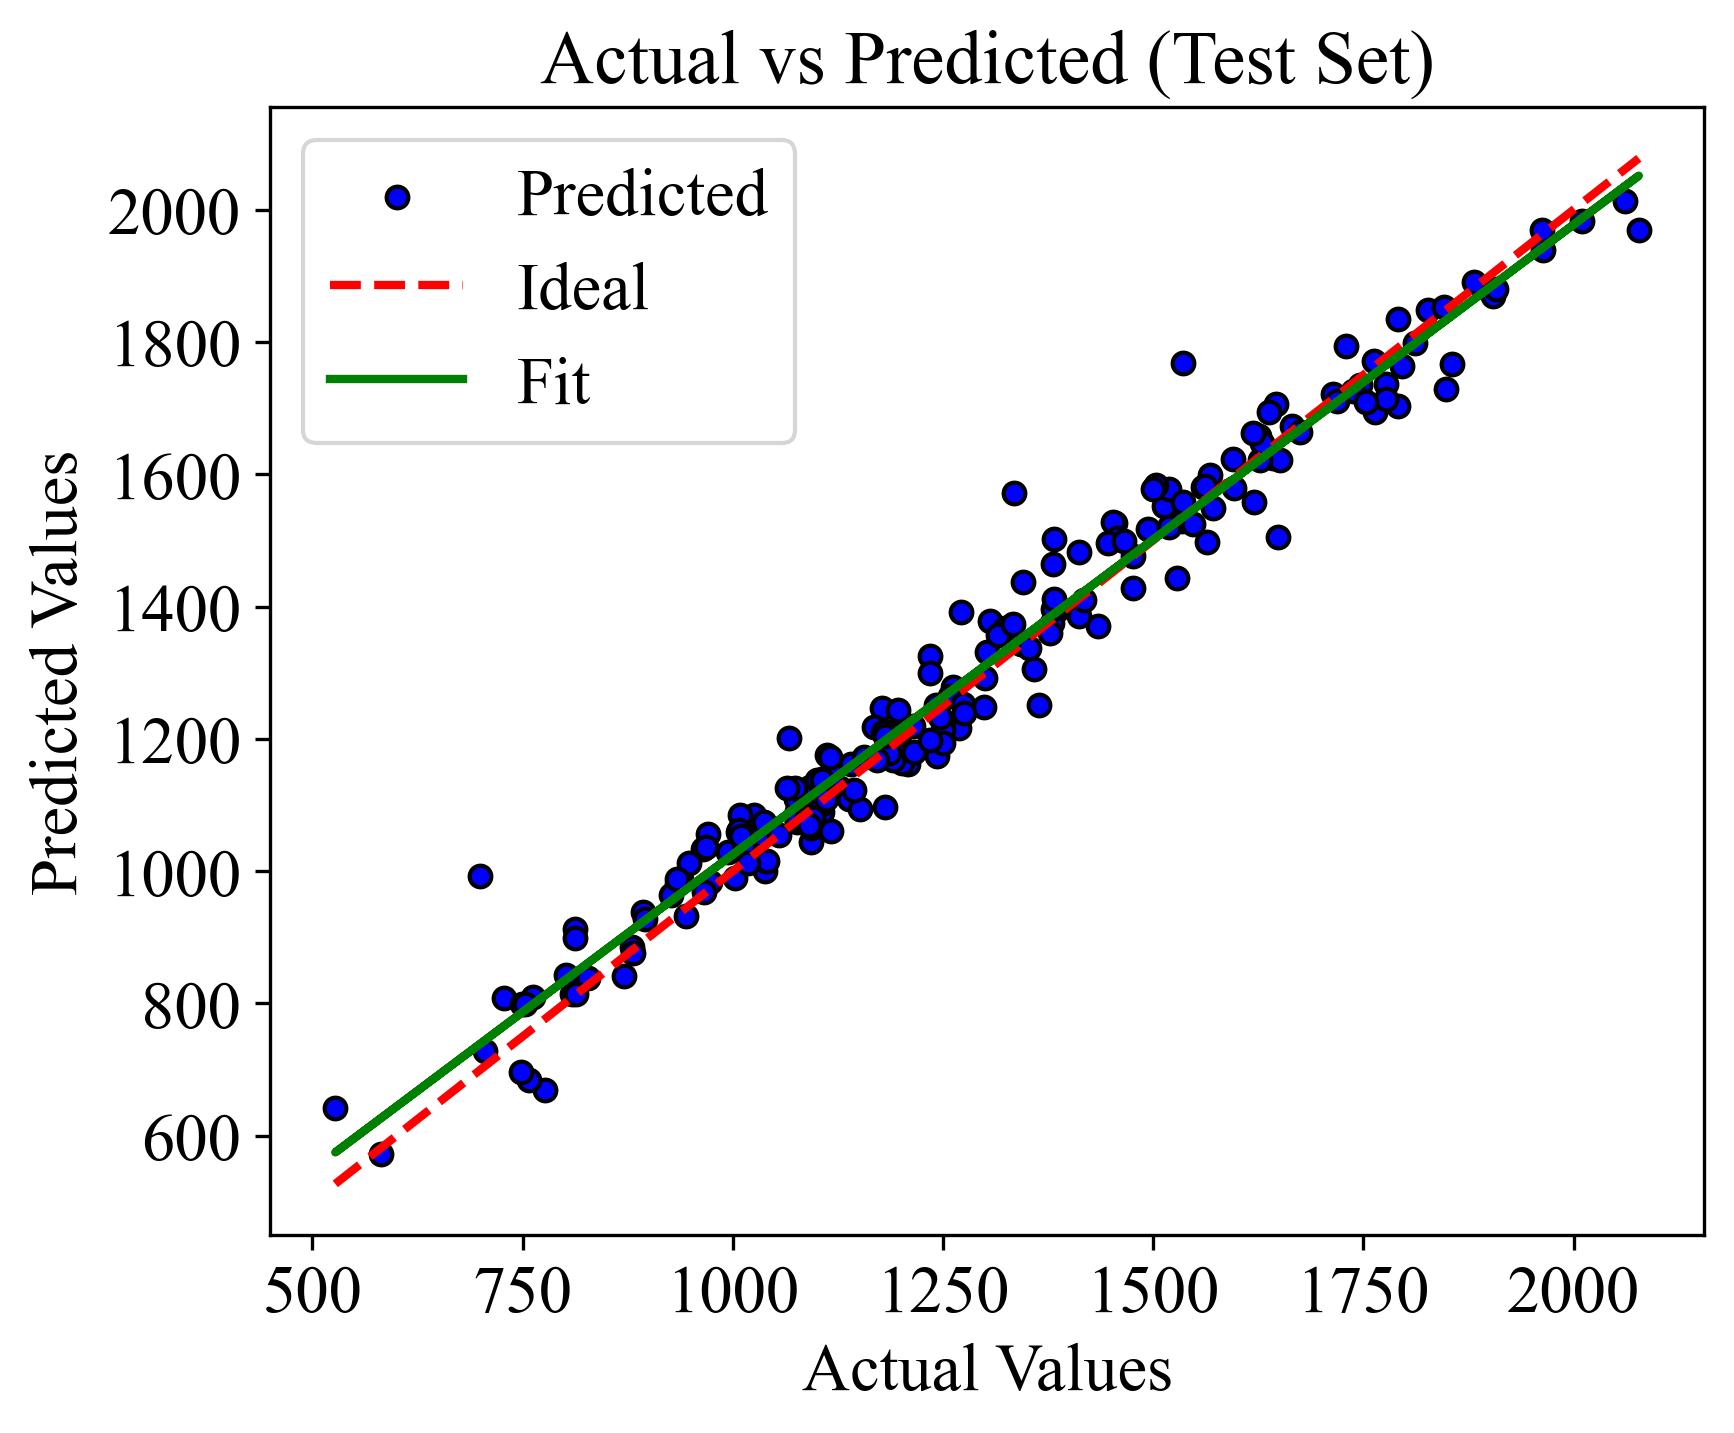

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def plot_actual_vs_pred(y_test, y_test_pred, title, save_path,
                        dpi=300, figsize=(6, 5), font_size=16, show_legend=True):
    # Convert to NumPy arrays (safe for both Series and arrays)
    y_test = np.array(y_test)
    y_test_pred = np.array(y_test_pred)

    plt.figure(figsize=figsize, dpi=dpi)

    # Scatter plot
    plt.scatter(y_test, y_test_pred, c='blue', label='Predicted', edgecolors='k', s=27)

    # Ideal red dashed line (perfect prediction)
    min_val = min(y_test.min(), y_test_pred.min())
    max_val = max(y_test.max(), y_test_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal')

    # Fit regression line
    model = LinearRegression()
    model.fit(y_test.reshape(-1, 1), y_test_pred)
    y_line = model.predict(y_test.reshape(-1, 1))

    plt.plot(y_test, y_line, color='green', linestyle='-', linewidth=2, label='Fit')

    # Add regression equation
    coef = model.coef_[0]
    intercept = model.intercept_
    
    

    # Labels and title
    plt.xlabel('Actual Values', fontsize=font_size)
    plt.ylabel('Predicted Values', fontsize=font_size)
    plt.title(title, fontsize=font_size + 2)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)

    if show_legend:
        plt.legend(fontsize=font_size)

    plt.grid(False)
    plt.tight_layout()
    plt.savefig(save_path, dpi=dpi)
    plt.show()


plot_actual_vs_pred(
    y_test, 
    y_test_pred,
    "Actual vs Predicted (Test Set)",
    "actual_vs_predicted.png",
    show_legend=True
)

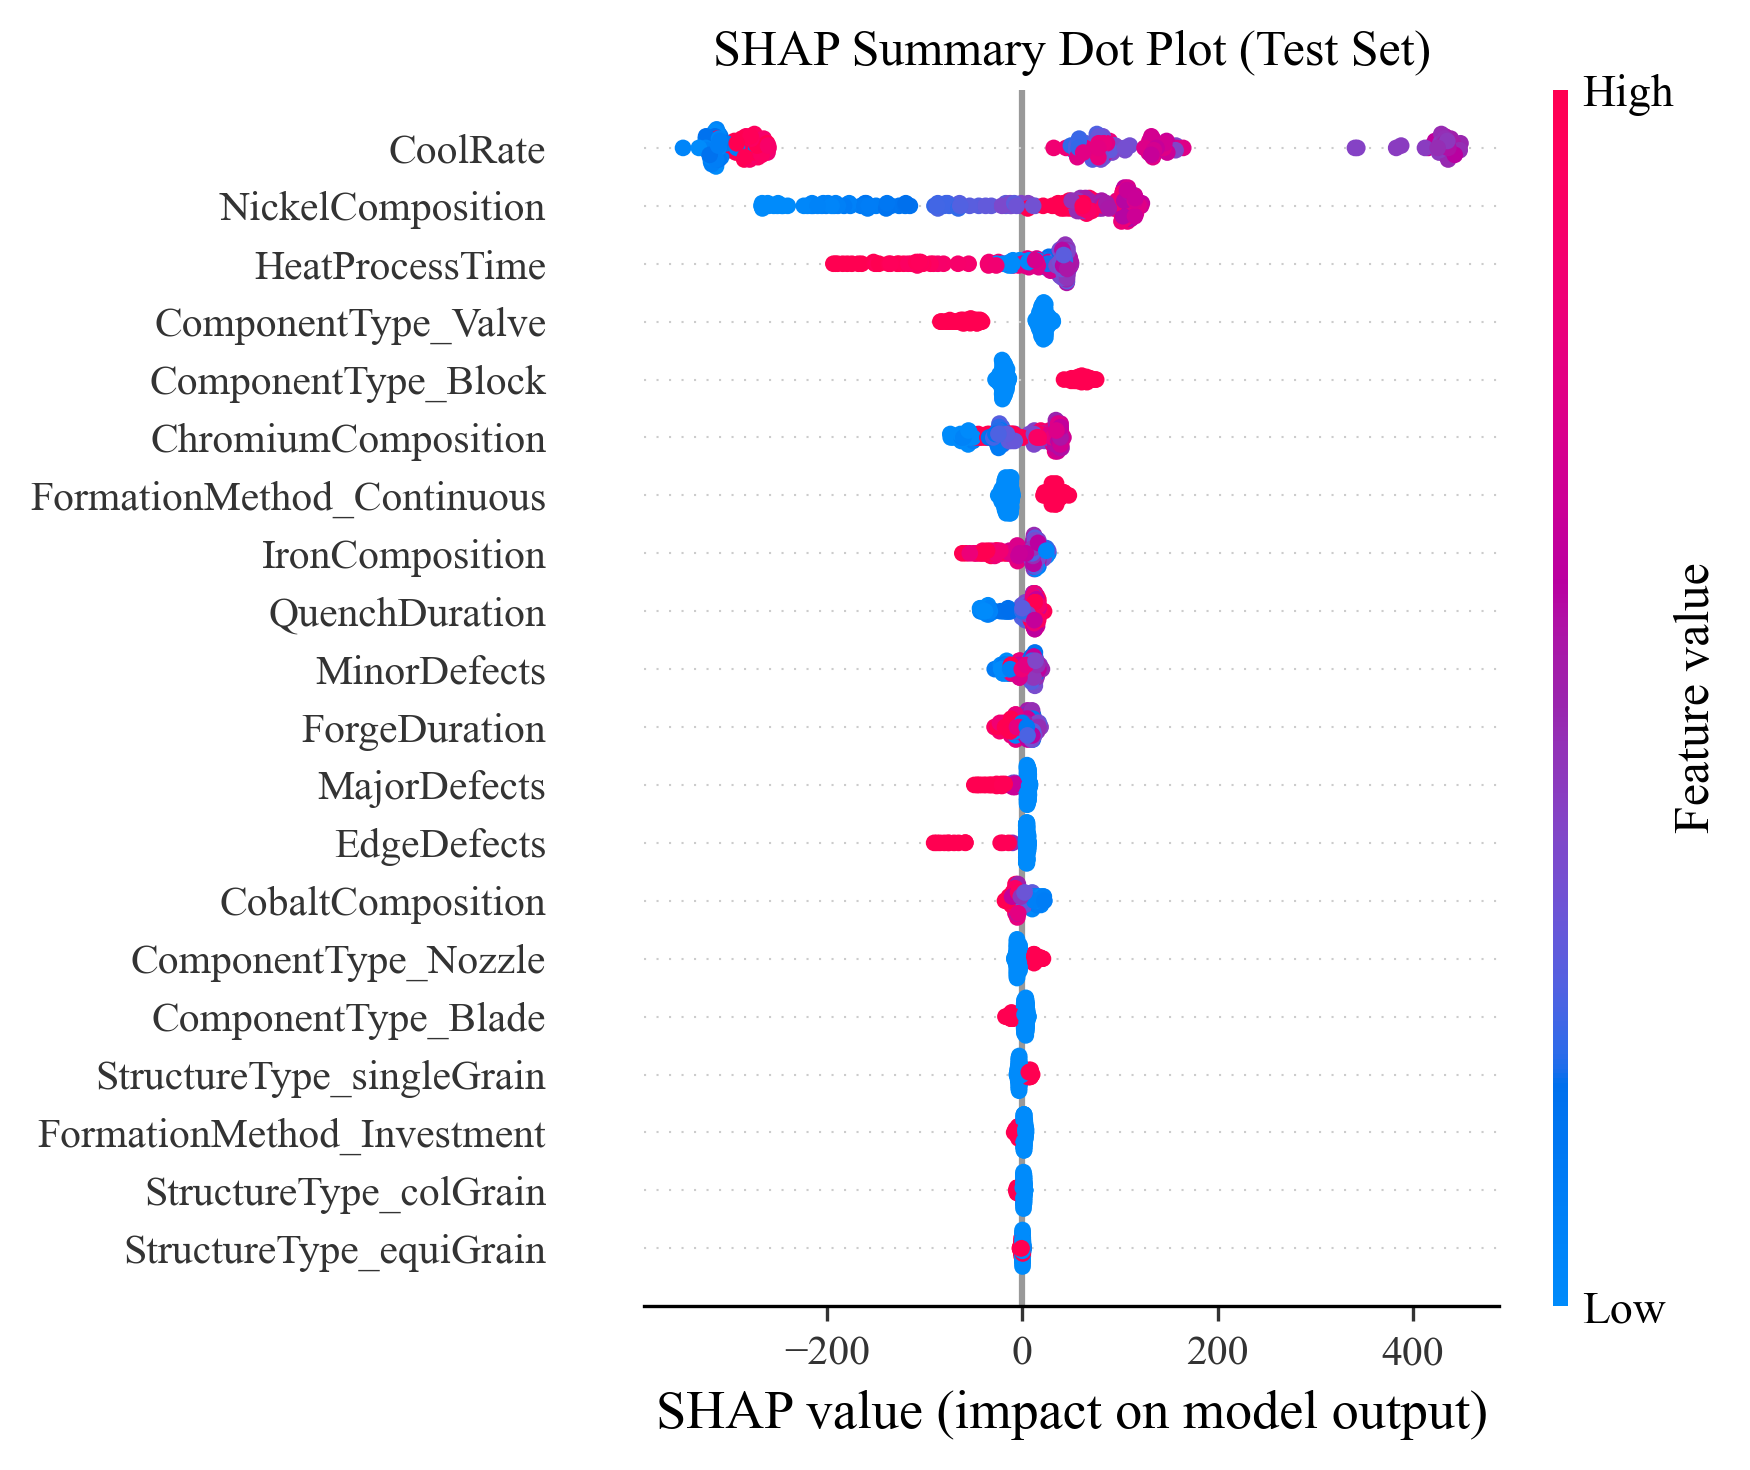

In [ ]:
import shap
import matplotlib.pyplot as plt

def plot_shap_summary_dot(shap_values, X, title, save_path,
                          dpi=300, figsize=(6, 5), font_size=10):
    # Set font and figure quality
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = font_size
    plt.rcParams["axes.grid"] = False
    plt.rcParams["figure.dpi"] = dpi

    # Plot SHAP summary (dot plot)
    shap.summary_plot(shap_values, X, show=False, plot_size=figsize)

    # Apply styling after SHAP draws the plot
    fig = plt.gcf()
    ax = plt.gca()
    ax.set_title(title, fontsize=font_size + 2)
    ax.tick_params(axis='both', labelsize=font_size)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    plt.show()


explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

plot_shap_summary_dot(
    shap_values,
    X_test,
    "SHAP Summary Dot Plot (Test Set)",
    "shap_summary_dot.png"
)
